# Project: Investigate the evolution of the world life expectancy  and the effects of GDP per capita & population in the life expectancy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Life expectancy in every country has changed along the years. Nowadays high life expectancies can be observed in richer countries compared to the poorer ones, but is this relation real?

The analysis will be focus on investigate the evolution of the life expectancy as well as the dependency on GDP per capita and population. It will be also investigated whether the total amount of money dedicated to health by the goverment influences the life expectancy, especially the private share of total health investment.

From Gapminder website several indicators were selected for supporting the analysis, namely:

- Life expectancy at bith (in years) 
- GDP or Gross Domestic Product per capita by Purchasing Power Parities (in international dollars, fixed 2011 prices)
- Population
- Total health expenditure (% GDP)
- Private share in the health investment

As the existence of data is limited, that means, not for all the countries there is information about life expectancy and those countries with data sometimes evolution with years is also limited to a timeframe. Taking this into consideration, there are some questions than can be raised:

1. How did life expectancy evolve with the time in the World?
2. Is the life expectancy dependent on GDP, in such a way that rich people live longer than poor people?
3. What about the population? Are the most populated country having less life expectancy or the other way around?
4. Are the countries which invest more money (% GDP) in health the ones having more life expectancy?



In [80]:
# -*- coding: utf-8 -*-

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


<a id='wrangling'></a>
## Data Wrangling



### General Properties

To perform the analysis presented in the **Introduction**, several Gapminder indicators will be downloaded and exported from Excel to create a pandas Dataframe. the indicators are:
- __[indicator life_expectancy_at_birth.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2tPLxKvvnNPA&output=xlsx)__
- __[indicator gapminder gdp_per_capita_ppp.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xlsx)__
- __[indicator gapminder population.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xlsx)__
- __[indicator total health expenditure perc of GDP.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj3XYThRy0yJMA&output=xlsx)__


The data in each Excel spreadsheet is included in the Sheet='Data' and I will not use any column to assign row labels.

In [3]:
life_df = pd.read_excel('indicator life_expectancy_at_birth.xlsx', 'Data', index_col=None)

To have a quick look at the dataframe created, head() and info() methods are used

In [4]:
life_df.head()

Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...    2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...    52.4  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8   
2    NaN    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...    76.6  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0   
4  28.82  28.82  ...    75.3  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4   

    2016  
0    NaN  
1  52.72  
2    NaN  
3  78.10  
4  76.50  

[5 rows x 218 columns]

In [5]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


After printing out the head of the "life expectancy" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2016, and they values are of the type float64
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be strind rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

In [6]:
life_df.tail()

Life expectancy   1800   1801   1802   1803   1804   1805   1806   1807  \
255      Yugoslavia    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
256          Zambia  32.60  32.60  32.60  32.60  32.60  32.60  32.60  32.60   
257        Zimbabwe  33.70  33.70  33.70  33.70  33.70  33.70  33.70  33.70   
258           Åland    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
259     South Sudan  26.67  26.67  26.67  26.67  26.67  26.67  26.67  26.67   

      1808  ...    2007  2008  2009  2010  2011  2012  2013  2014  2015   2016  
255    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
256  32.60  ...    49.0  51.1  52.3  53.1  53.7  54.7  55.6  56.3  56.7  57.10  
257  33.70  ...    46.4  47.3  48.0  49.1  51.6  54.2  55.7  57.0  59.3  61.69  
258    NaN  ...     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
259  26.67  ...    55.5  55.6  55.8  56.0  55.9  56.0  56.0  56.1  56.1  56.10  

[5 rows x 218 columns]

Same procedure will be followed for the next indicator: **GDP per capita**

In [7]:
GDP_df = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx', 'Data', index_col=None)
GDP_df.head()

GDP per capita   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  603.0  603.0  603.0  603.0  603.0  603.0  603.0   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  667.0  667.0  668.0  668.0  668.0  668.0  668.0   
4                Algeria  716.0  716.0  717.0  718.0  719.0  720.0  721.0   

    1807   1808   ...        2006     2007     2008     2009     2010  \
0    NaN    NaN   ...         NaN      NaN      NaN      NaN      NaN   
1  603.0  603.0   ...      1173.0   1298.0   1311.0   1548.0   1637.0   
2    NaN    NaN   ...         NaN      NaN      NaN      NaN      NaN   
3  668.0  668.0   ...      7476.0   7977.0   8644.0   8994.0   9374.0   
4  722.0  723.0   ...     12088.0  12289.0  12314.0  12285.0  12494.0   

      2011     2012     2013     2014     2015  
0      NaN      NaN      NaN      NaN      NaN  
1   1695.0   1893.0   1884.0   1877.0   1925.0  
2      NaN      NaN      NaN      NaN      NaN  
3   9640.0   9811.0   9961.0  10160.0  10620.0  
4  12606.0  12779.0  12893.0  13179.0  13434.0  

[5 rows x 217 columns]

In [8]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 217 entries, GDP per capita to 2015
dtypes: float64(216), object(1)
memory usage: 444.2+ KB


After printing out the head of the "GDP" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2015, and they values are of the type float64
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be string rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

Same procedure will be followed for the next indicator: **Population**

In [9]:
population_df = pd.read_excel('indicator gapminder population.xlsx', 'Data', index_col=None)
population_df.head()

Total population       1800       1810       1820       1830  \
0               Abkhazia        NaN        NaN        NaN        NaN   
1            Afghanistan  3280000.0  3280000.0  3323519.0  3448982.0   
2  Akrotiri and Dhekelia        NaN        NaN        NaN        NaN   
3                Albania   410445.0   423591.0   438671.0   457234.0   
4                Algeria  2503218.0  2595056.0  2713079.0  2880355.0   

        1840       1850       1860       1870       1880     ...      \
0        NaN        NaN        NaN        NaN        NaN     ...       
1  3625022.0  3810047.0  3973968.0  4169690.0  4419695.0     ...       
2        NaN        NaN        NaN        NaN        NaN     ...       
3   478227.0   506889.0   552800.0   610036.0   672544.0     ...       
4  3082721.0  3299305.0  3536468.0  3811028.0  4143163.0     ...       

         2006        2007        2008        2009        2010        2011  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1  25183615.0  25877544.0  26528741.0  27207291.0  27962207.0  28809167.0   
2     15700.0     15700.0     15700.0         NaN         NaN         NaN   
3   3050741.0   3010849.0   2968026.0   2929886.0   2901883.0   2886010.0   
4  33749328.0  34261971.0  34811059.0  35401790.0  36036159.0  36717132.0   

         2012        2013        2014        2015  
0         NaN         NaN         NaN         NaN  
1  29726803.0  30682500.0  31627506.0  32526562.0  
2         NaN         NaN         NaN         NaN  
3   2880667.0   2883281.0   2889676.0   2896679.0  
4  37439427.0  38186135.0  38934334.0  39666519.0  

[5 rows x 82 columns]

In [10]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 82 columns):
Total population    275 non-null object
1800                229 non-null float64
1810                229 non-null float64
1820                229 non-null float64
1830                229 non-null float64
1840                229 non-null float64
1850                229 non-null float64
1860                229 non-null float64
1870                229 non-null float64
1880                229 non-null float64
1890                229 non-null float64
1900                229 non-null float64
1910                229 non-null float64
1920                229 non-null float64
1930                229 non-null float64
1940                229 non-null float64
1950                256 non-null float64
1951                256 non-null float64
1952                256 non-null float64
1953                256 non-null float64
1954                256 non-null float64
1955                256 non-null fl

After printing out the head of the "population" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2015, and they values are of the type float64, except the first colum, that is, the country column that are strings
 - depending on the year, the number of countries with information differs, this is the reason to have a large info() output. 
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be string rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

Same procedure will be followed for the next indicator: **Total Health Expenditure (% GDP)**

In [11]:
health_exp_df = pd.read_excel('indicator total health expenditure perc of GDP.xlsx', 'Data', index_col=None)
health_exp_df.head()

Total expenditure on health as percentage of GDP (gross domestic product)  \
0                                           Abkhazia                          
1                                        Afghanistan                          
2                              Akrotiri and Dhekelia                          
3                                            Albania                          
4                                            Algeria                          

       1995      1996      1997      1998      1999      2000      2001  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  2.559558  4.041886  4.806430  5.338640  5.833766  6.350044  6.044854   
4  4.173543  3.788035  4.060305  4.063201  3.868854  3.489033  3.837877   

       2002      2003      2004      2005      2006      2007      2008  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  5.716590  6.819749  6.356457  6.630313  6.769914  7.301355  6.979427   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  6.277196  6.163815  6.883454  6.840532  6.731867  6.877242  6.748861   
4  3.873390  3.744365  3.378307  3.064177  3.129454  3.534485  3.733193   

       2009      2010  
0       NaN       NaN  
1  7.579306  7.584483  
2       NaN       NaN  
3  6.883065  6.547298  
4  4.576056  4.172063

In [12]:
health_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 17 columns):
Total expenditure on health as percentage of GDP (gross domestic product)    262 non-null object
1995                                                                         189 non-null float64
1996                                                                         190 non-null float64
1997                                                                         190 non-null float64
1998                                                                         191 non-null float64
1999                                                                         191 non-null float64
2000                                                                         191 non-null float64
2001                                                                         190 non-null float64
2002                                                                         190 non-null float64
2003          

After printing out the head of the "health expenditure" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1995 to 2010, and they values are of the type float64, except the first colum, that is, the country column that are strings
 - depending on the year, the number of countries with information differs, this is the reason to have a large info() output. 
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be string rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

### Data Cleaning

Now the cleaning process will be performed for every dataset:
- NaNs will be drop
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

In [13]:
life_df.dropna(inplace=True)
life_df.rename(columns={str('Life expectancy'): 'country'}, inplace=True)
life_df.set_index('country', inplace=True)
life_df.head()

1800   1801   1802   1803   1804   1805   1806   1807  \
country                                                                       
Afghanistan          28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14   
Albania              35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
Algeria              28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   
Angola               26.98  26.98  26.98  26.98  26.98  26.98  26.98  26.98   
Antigua and Barbuda  33.54  33.54  33.54  33.54  33.54  33.54  33.54  33.54   

                      1808   1809  ...    2007  2008  2009  2010  2011  2012  \
country                            ...                                         
Afghanistan          28.13  28.12  ...    52.4  52.8  53.3  53.6  54.0  54.4   
Albania              35.40  35.40  ...    76.6  76.8  77.0  77.2  77.4  77.5   
Algeria              28.82  28.82  ...    75.3  75.5  75.7  76.0  76.1  76.2   
Angola               26.98  26.98  ...    56.2  56.7  57.1  57.6  58.1  58.5   
Antigua and Barbuda  33.54  33.54  ...    75.3  75.5  75.7  75.8  75.9  76.1   

                     2013  2014  2015   2016  
country                                       
Afghanistan          54.8  54.9  53.8  52.72  
Albania              77.7  77.9  78.0  78.10  
Algeria              76.3  76.3  76.4  76.50  
Angola               58.8  59.2  59.6  60.00  
Antigua and Barbuda  76.2  76.3  76.4  76.50  

[5 rows x 217 columns]

The data about life expectancy are from 1800 until 2016, both inclusive. With this dataframe, the problem is that the years is not a column but column label for year-column. This can be solved using stack method to the dataframe that will create a multi index Series, that can be also converted to a Dataframe that would require an index reset to create a column label *'country'* and the *'life_exp'*, otherwise a multi index dataframe would be created.

In [14]:
life_df1 = pd.DataFrame(life_df.stack())
life_df1.reset_index(inplace=True)
life_df1.rename(columns={'level_1': 'year', 0 : 'life_exp'}, inplace=True)
life_df1.head()

country  year  life_exp
0  Afghanistan  1800     28.21
1  Afghanistan  1801     28.20
2  Afghanistan  1802     28.19
3  Afghanistan  1803     28.18
4  Afghanistan  1804     28.17

Before moving forward I make a check of the year column as they were first "labels", so the type could be different from integer.

In [15]:
life_df1['year'].dtypes

dtype('int64')

The column year contains integers, so we can proceed to slice the dataframe to a year time frame matching the main data sets: life expectancy, GDP and population, that is 1800-2015 as the GDP and population is having information until 2015. So we remove from the life_expectancy dataframe all the information from 2016.

In [16]:
life_df1 = life_df1[life_df1.year <= 2015]
life_df1.head(1)

country  year  life_exp
0  Afghanistan  1800     28.21

In [17]:
life_df1.tail(1)

country  year  life_exp
43615  South Sudan  2015      56.1

In [18]:
life_df1.shape

(43416, 3)

Using the attribute shape, we find out that this dataframe contains 43416 rows.

Same procedure will be followed for the next indicator: **GDP per capita**

In [19]:
GDP_df.dropna(inplace=True)
GDP_df.rename(columns={str('GDP per capita'): 'country'}, inplace=True)
GDP_df.set_index('country', inplace=True)
GDP_df.head()

1800    1801    1802    1803    1804    1805    1806    1807  \
country                                                                       
Afghanistan   603.0   603.0   603.0   603.0   603.0   603.0   603.0   603.0   
Albania       667.0   667.0   668.0   668.0   668.0   668.0   668.0   668.0   
Algeria       716.0   716.0   717.0   718.0   719.0   720.0   721.0   722.0   
Andorra      1197.0  1199.0  1201.0  1204.0  1206.0  1208.0  1210.0  1212.0   
Angola        618.0   620.0   623.0   626.0   628.0   631.0   634.0   637.0   

               1808    1809   ...        2006     2007     2008     2009  \
country                       ...                                          
Afghanistan   603.0   603.0   ...      1173.0   1298.0   1311.0   1548.0   
Albania       668.0   668.0   ...      7476.0   7977.0   8644.0   8994.0   
Algeria       723.0   724.0   ...     12088.0  12289.0  12314.0  12285.0   
Andorra      1215.0  1217.0   ...     42738.0  43442.0  41426.0  41735.0   
Angola        640.0   642.0   ...      5445.0   6453.0   7103.0   7039.0   

                2010     2011     2012     2013     2014     2015  
country                                                            
Afghanistan   1637.0   1695.0   1893.0   1884.0   1877.0   1925.0  
Albania       9374.0   9640.0   9811.0   9961.0  10160.0  10620.0  
Algeria      12494.0  12606.0  12779.0  12893.0  13179.0  13434.0  
Andorra      38982.0  41958.0  41926.0  43735.0  44929.0  46577.0  
Angola        7047.0   7094.0   7230.0   7488.0   7546.0   7615.0  

[5 rows x 216 columns]

In [20]:
GDP_df1 = pd.DataFrame(GDP_df.stack())
GDP_df1.reset_index(inplace=True)
GDP_df1.rename(columns={'level_1': 'year', 0 : 'GDP'}, inplace=True)
GDP_df1.head()

country  year    GDP
0  Afghanistan  1800  603.0
1  Afghanistan  1801  603.0
2  Afghanistan  1802  603.0
3  Afghanistan  1803  603.0
4  Afghanistan  1804  603.0

In [21]:
GDP_df1['year'].dtypes

dtype('int64')

We observe that also the data type of the years are integer. And we check how many rows we have for the GDP dataframe.

In [22]:
GDP_df1.shape

(43416, 3)

Same procedure will be followed for the next indicator: **Population**

In [23]:
population_df.dropna(inplace=True)
population_df.rename(columns={'Total population': 'country'}, inplace=True)
population_df.set_index('country', inplace=True)
population_df.head()

1800       1810       1820       1830       1840  \
country                                                                 
Afghanistan     3280000.0  3280000.0  3323519.0  3448982.0  3625022.0   
Albania          410445.0   423591.0   438671.0   457234.0   478227.0   
Algeria         2503218.0  2595056.0  2713079.0  2880355.0  3082721.0   
American Samoa     8170.0     8156.0     8142.0     8128.0     8114.0   
Andorra            2654.0     2654.0     2700.0     2835.0     3026.0   

                     1850       1860       1870       1880       1890  \
country                                                                 
Afghanistan     3810047.0  3973968.0  4169690.0  4419695.0  4710171.0   
Albania          506889.0   552800.0   610036.0   672544.0   741688.0   
Algeria         3299305.0  3536468.0  3811028.0  4143163.0  4525691.0   
American Samoa     7958.0     7564.0     7057.0     6582.0     6139.0   
Andorra            3230.0     3436.0     3654.0     3885.0     4131.0   

                   ...            2006        2007        2008        2009  \
country            ...                                                       
Afghanistan        ...      25183615.0  25877544.0  26528741.0  27207291.0   
Albania            ...       3050741.0   3010849.0   2968026.0   2929886.0   
Algeria            ...      33749328.0  34261971.0  34811059.0  35401790.0   
American Samoa     ...         58648.0     57904.0     57031.0     56226.0   
Andorra            ...         83373.0     84878.0     85616.0     85474.0   

                      2010        2011        2012        2013        2014  \
country                                                                      
Afghanistan     27962207.0  28809167.0  29726803.0  30682500.0  31627506.0   
Albania          2901883.0   2886010.0   2880667.0   2883281.0   2889676.0   
Algeria         36036159.0  36717132.0  37439427.0  38186135.0  38934334.0   
American Samoa     55636.0     55316.0     55227.0     55302.0     55434.0   
Andorra            84419.0     82326.0     79316.0     75902.0     72786.0   

                      2015  
country                     
Afghanistan     32526562.0  
Albania          2896679.0  
Algeria         39666519.0  
American Samoa     55538.0  
Andorra            70473.0  

[5 rows x 81 columns]

In [24]:
population_df1 = pd.DataFrame(population_df.stack())
population_df1.reset_index(inplace=True)
population_df1.rename(columns={'level_1': 'year', 0 : 'population'}, inplace=True)
population_df1.head()

country  year  population
0  Afghanistan  1800   3280000.0
1  Afghanistan  1810   3280000.0
2  Afghanistan  1820   3323519.0
3  Afghanistan  1830   3448982.0
4  Afghanistan  1840   3625022.0

In [25]:
population_df1['year'].dtypes

dtype('int64')

In [26]:
population_df1.shape

(18549, 3)

Same procedure will be followed for the next indicator: **Total health expenditure**

In [27]:
health_exp_df.dropna(inplace=True)
health_exp_df.rename(columns={str('Total expenditure on health as percentage of GDP (gross domestic product)'): 'country'}, inplace=True)
health_exp_df.set_index('country', inplace=True)
health_exp_df.head()

1995      1996      1997      1998      1999  \
country                                                                 
Albania              2.559558  4.041886  4.806430  5.338640  5.833766   
Algeria              4.173543  3.788035  4.060305  4.063201  3.868854   
Andorra              7.644394  8.029186  8.026615  9.847322  7.352147   
Angola               3.794290  2.164772  2.260741  1.855355  1.937973   
Antigua and Barbuda  4.876219  4.606434  4.642401  4.641577  4.676057   

                         2000      2001      2002      2003      2004  \
country                                                                 
Albania              6.350044  6.044854  6.277196  6.163815  6.883454   
Algeria              3.489033  3.837877  3.873390  3.744365  3.378307   
Andorra              7.585239  6.792229  7.044575  7.120286  7.111577   
Angola               2.408962  3.449842  2.364108  2.639531  2.086834   
Antigua and Barbuda  4.767773  4.611381  4.621272  4.708811  4.664697   

                         2005      2006      2007      2008      2009  \
country                                                                 
Albania              6.840532  6.731867  6.877242  6.748861  6.883065   
Algeria              3.064177  3.129454  3.534485  3.733193  4.576056   
Andorra              7.224219  7.443895  7.553074  7.544590  7.522054   
Angola               1.959893  2.415178  2.522288  3.190209  4.946633   
Antigua and Barbuda  4.662399  4.521800  4.445126  4.296673  4.806066   

                         2010  
country                        
Albania              6.547298  
Algeria              4.172063  
Andorra              7.522876  
Angola               2.850614  
Antigua and Barbuda  6.027904

In [28]:
health_exp_df1 = pd.DataFrame(health_exp_df.stack())
health_exp_df1.reset_index(inplace=True)
health_exp_df1.rename(columns={'level_1': 'year', 0 : 'health_expenditure'}, inplace=True)
health_exp_df1.head()

country  year  health_expenditure
0  Albania  1995            2.559558
1  Albania  1996            4.041886
2  Albania  1997            4.806430
3  Albania  1998            5.338640
4  Albania  1999            5.833766

In [29]:
health_exp_df1['year'].dtypes

dtype('int64')

In [30]:
health_exp_df1.shape

(2928, 3)

Having both life expectancy, GDP per capita and population dataframes reshaped, I will merge first two and afterwards the third one, and the merge operation will be done with  the column country and year "ON" and with the argument "inner"  to use the intersection of keys from both frames.

In [31]:
df_1 = pd.merge(life_df1, GDP_df1, how='inner', on = ['country','year'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40824 entries, 0 to 40823
Data columns (total 4 columns):
country     40824 non-null object
year        40824 non-null int64
life_exp    40824 non-null float64
GDP         40824 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


The dataframe created after merging the two dataframes life expectancy and GDP per capita contains 40824 rows. To this new dataframe, I will add the population making the same operation with merge. 

In [32]:
df = pd.merge(df_1, population_df1, how='inner', on = ['country','year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15228 entries, 0 to 15227
Data columns (total 5 columns):
country       15228 non-null object
year          15228 non-null int64
life_exp      15228 non-null float64
GDP           15228 non-null float64
population    15228 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 713.8+ KB


And it can be observed that the result contains less rows. That means, not the same countries at the same years have all three values: life expectancy, GDP, population. And finally a last check-out of the final dataframe with head() and tail().

In [33]:
df.head()

country  year  life_exp    GDP  population
0  Afghanistan  1800     28.21  603.0   3280000.0
1  Afghanistan  1810     28.11  604.0   3280000.0
2  Afghanistan  1820     28.01  604.0   3323519.0
3  Afghanistan  1830     27.90  625.0   3448982.0
4  Afghanistan  1840     27.80  647.0   3625022.0

In [34]:
df.tail()

country  year  life_exp     GDP  population
15223  South Sudan  2011      55.9  3505.0  10510122.0
15224  South Sudan  2012      56.0  1810.0  10980623.0
15225  South Sudan  2013      56.0  1965.0  11453810.0
15226  South Sudan  2014      56.1  2574.0  11911184.0
15227  South Sudan  2015      56.1  3047.0  12339812.0

Note that for the moment, the total health expenditure dataframe will not be merged as this dataset is containing much fewer data, namely only from 1995 to 2010. When afterwards tackling the question about total health investment, the biggest dataframe will be sliced to this year dataframe.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: <font color=blue>How did life expectancy in the World evolve with the time?</font>
To answer this question I will consider the mean of the life expectancy in the world and will plot the evolution of this variable with the time. To add more information, I will plot also the minimum and maximum of the life expectancy.
This plot can be made with the original dataframe containing only information about life expectancy or with the merged dataframe, but the last would have less samples (15228 vs. 40824).

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


Text(0.5,1,'Evolution of Average Life expectancy in the World')

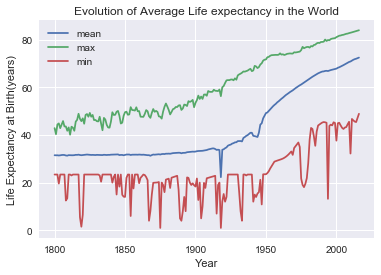

In [35]:
life_df.mean().plot(label='mean',legend=True)
life_df.max().plot(label='max',legend=True)
life_df.min().plot(label='min',legend=True)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth(years)')
plt.title('Evolution of Average Life expectancy in the World')

As this dataframe contains much more information that the merged one, I will look for the average life expectancy in 1800 and in 2015 in this dataframe. But before looking at this plot, I want to know the average life expectancy in the world in 1800 compared to 2016.

In [36]:
life_df.mean().head(1)

1800    31.48602
dtype: float64

In [37]:
life_df.mean().tail(2)

2015    72.187861
2016    72.428507
dtype: float64

Looking at the previous plot, the life expectancy did not change too much from 1800 until 1900 where starts to increase slowly to have a strong decrease around end of the '20s and after that increasing steadily until today, with again a light decrease around '40s.

What dit happen in the World that caused this sudden decrease to hit a minimum? The minimum can be searched looking for the year when the minimum happened:

In [38]:
life_df.mean().idxmin()

1918

1918 was the end of the first big war in the World: World War I, which is a pausible reason to hit the life expectancy in the world. The shortly change in tendency around 40's might be explained by the 2nd World War.

Similar plot might be done using the dataframe as a result of merging the three original dataframes. Let´s look if the plots are similar. But for plotting the same variable, I will have to use the "groupby" method and grouping by the key 'year'. And to this groupby object I will apply the methods mean, max and min to the column 'life expectancy' and will plot the results.

Text(0.5,1,'Evolution of Average Life expectancy in the World')

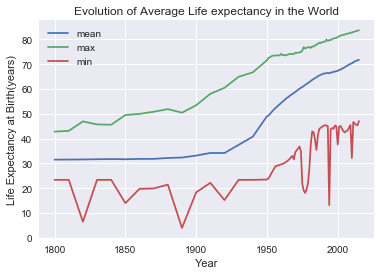

In [39]:
df.groupby(['year'])['life_exp'].mean().plot(label='mean',legend=True)
df.groupby(['year'])['life_exp'].max().plot(label='max',legend=True)
df.groupby(['year'])['life_exp'].min().plot(label='min',legend=True)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth(years)')
plt.title('Evolution of Average Life expectancy in the World')

In this plot, it can be seen that now the min peak in the mean value is gone. Also the trend change around the 40's is not anymore observable. So we can infer that the loss of ~25000 rows of information had an influence in the data that we are plotting, at least in the local observations but not in the global picture, as both plots confirms that the life expectancy increased with the years since 1800 (with 31.5 year), specially after ~1900 where the industrial revolution might be the most likely driver with a steeper slope after the 2nd Word War and showing before 2000s sort of a leveling-off to keep increasing until today (72.4 year in 2016).

It can also be found which is the country with less life expectancy and when happened that minimum....

In [40]:
df.loc[df['life_exp'].idxmin()]

country          Ethiopia
year                 1890
life_exp                4
GDP                   537
population    7.83238e+06
Name: 4383, dtype: object

that is, Ethiopia in 1890 with 4 year old, which is quite low!!! Let´s take a look at Ethiopia life expectancy evolution with time ..... 

For doing that I will group the dataframe per country and split the dataframe only with the data of Ethiopia using the function get_group() and plot the life expectancy in Ethiopia vs. Years

Text(0.5,1,'Evolution of Life expectancy in the Ethiopia')

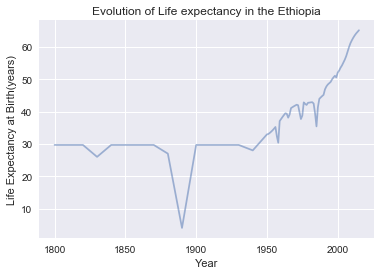

In [56]:
df_grouped = df.groupby(['country']).get_group('Ethiopia')


x = df_grouped['year']
y = df_grouped['life_exp']
fig, ax = plt.subplots()
im = ax.plot(x, y, alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth(years)')
plt.title('Evolution of Life expectancy in the Ethiopia')

The plot confirms that in 1890 the life expectancy reduced considerably. An internet search found the following that might explain this abrupt peak:

*"In the 1890s Ethiopia suffered from pandemics and famines. Rinderpest killed most of the horned animals, and many people suffered and died from cholera.(...)"*
Source: __http://www.san.beck.org/16-11-Ethiopia,Somaliland.html#a2__

and which is the country with the maximum life expectancy in the world ...?

I will look in the column 'life expectancy' the maximum value and dump the information in the dataframe for this row

In [57]:
df.loc[df['life_exp'].idxmax()]

country       Hong Kong, China
year                      2015
life_exp                 83.73
GDP                      53874
population         7.28798e+06
Name: 5912, dtype: object

and this result in Hong Kong with a life expectancy of 83.7 years in 2015.

### Research Question 2: <font color=blue>Is the life expectancy dependent on GDP, in such a way that e.g. rich people live longer than poor people?</font> 


The analysis of the dependency of life expectancy on GDP per capita will be performed for 2015 as this is the most recent year with information in the dataframes. For doing that, only the information corresponding to this year will be considered.

I will slice the dataframe to one only containing the data for 2015, namely life expectancy, GDP and population of the countries.

In [58]:
df_2015 = df[df.year == 2015]

And I will reset the index to make easy afterwords the annotation of the datapoints with the country word in the scatter plot.

In [59]:
df_2015.reset_index(drop=True, inplace=True)
df_2015.head()

country  year  life_exp      GDP  population
0          Afghanistan  2015      53.8   1925.0  32526562.0
1              Albania  2015      78.0  10620.0   2896679.0
2              Algeria  2015      76.4  13434.0  39666519.0
3               Angola  2015      59.6   7615.0  25021974.0
4  Antigua and Barbuda  2015      76.4  21049.0     91818.0

In [60]:
df_2015.tail()

country  year  life_exp     GDP  population
183      Vietnam  2015      75.4  5623.0  93447601.0
184        Yemen  2015      66.0  3887.0  26832215.0
185       Zambia  2015      56.7  4034.0  16211767.0
186     Zimbabwe  2015      59.3  1801.0  15602751.0
187  South Sudan  2015      56.1  3047.0  12339812.0

To look for any correlation between GDP and life expectancy, I will plot an scatter with both variables and add the text of the country to each point. 

Text(0.5,1,'Effect of GDP on Life Expectancy in a country')

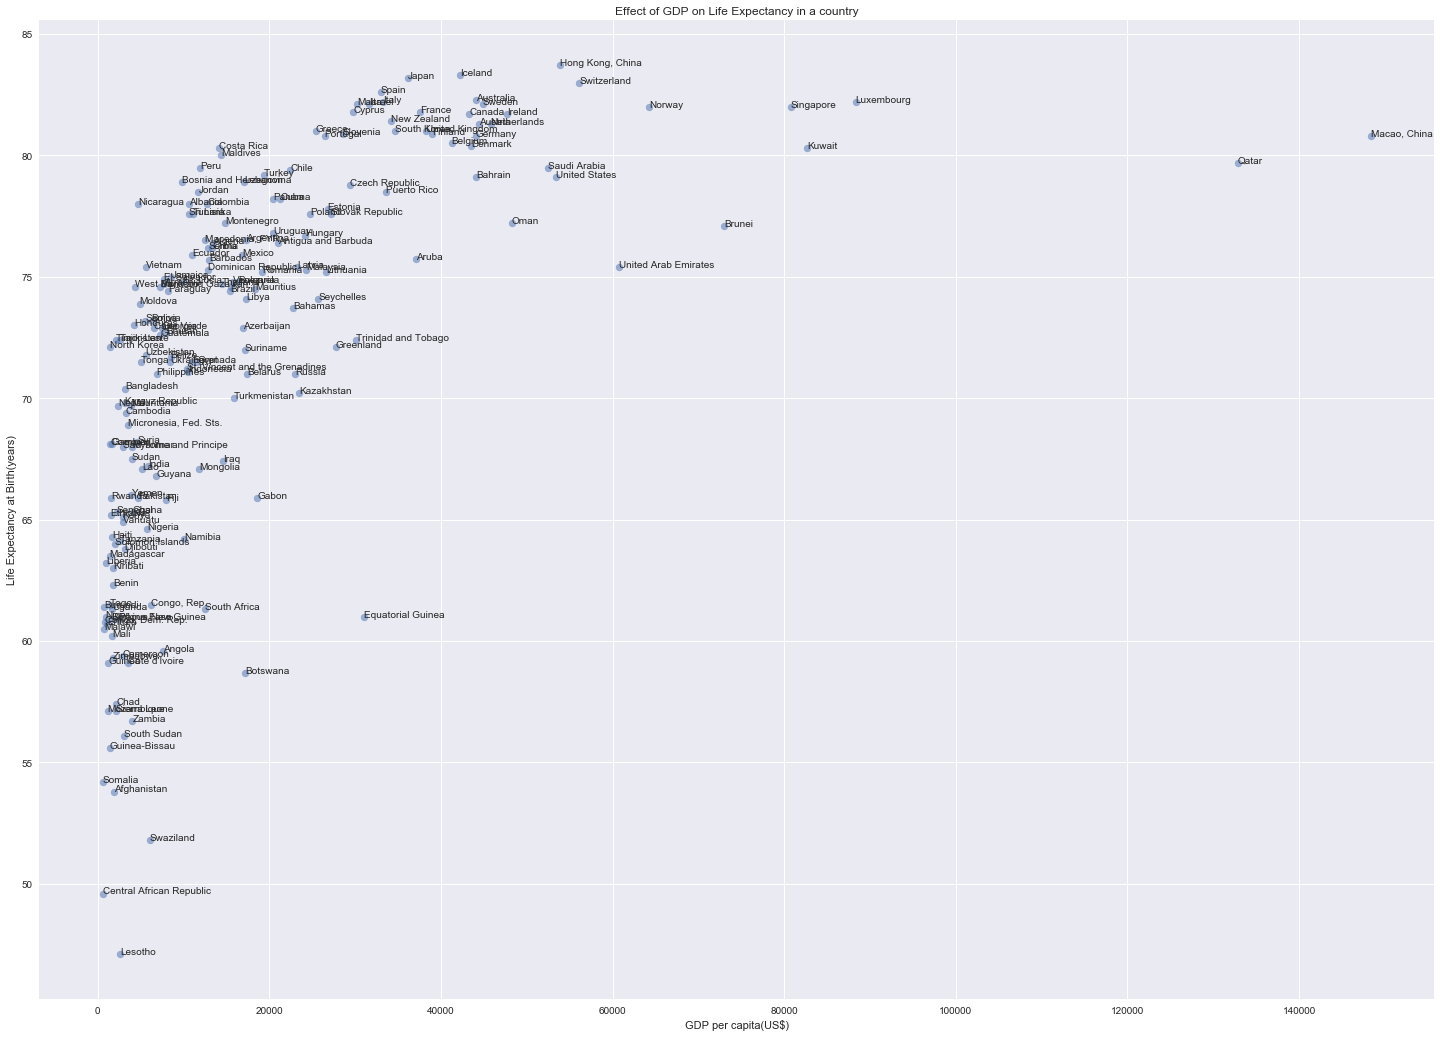

In [62]:
x = df_2015['GDP']
y = df_2015['life_exp']
n = df_2015['country']
fig, ax = plt.subplots(figsize=(25,18))
im = ax.scatter(x, y, alpha=0.5)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
    
plt.xlabel('GDP per capita(US$)')
plt.ylabel('Life Expectancy at Birth(years)')
plt.title('Effect of GDP on Life Expectancy in a country')

To support my analysis, I will retrieve the life expectancy and the GDP in 2015 for several countries: Macao (China) Greece, Qatar, Peru, Equatorial Guinea, Cyprus

In [63]:
print (df_2015[df_2015.country.str.contains('Macao')]['life_exp'])
print (df_2015[df_2015.country.str.contains('Macao')]['GDP'])

100    80.82
Name: life_exp, dtype: float64
100    148374.0
Name: GDP, dtype: float64


In [64]:
print (df_2015[df_2015.country =='Greece']['life_exp'])
print (df_2015[df_2015.country =='Greece']['GDP'])

63    81.0
Name: life_exp, dtype: float64
63    25430.0
Name: GDP, dtype: float64


In [65]:
print (df_2015[df_2015.country =='Qatar']['life_exp'])
print (df_2015[df_2015.country =='Qatar']['GDP'])

136    79.7
Name: life_exp, dtype: float64
136    132877.0
Name: GDP, dtype: float64


In [66]:
print (df_2015[df_2015.country =='Peru']['life_exp'])
print (df_2015[df_2015.country =='Peru']['GDP'])

131    79.5
Name: life_exp, dtype: float64
131    11903.0
Name: GDP, dtype: float64


In [67]:
print (df_2015[df_2015.country.str.startswith('Equatorial')]['life_exp'])
print (df_2015[df_2015.country.str.startswith('Equatorial')]['GDP'])

51    61.0
Name: life_exp, dtype: float64
51    31087.0
Name: GDP, dtype: float64


In [68]:
print (df_2015[df_2015.country =='Cyprus']['life_exp'])
print (df_2015[df_2015.country =='Cyprus']['GDP'])

43    81.8
Name: life_exp, dtype: float64
43    29797.0
Name: GDP, dtype: float64


At a quick glance to the scatter plot above, it might be inferred that countries showing the highest GDPs are also having high life expectancies (e.g. Macao(China), Qatar, Luxemburg). And countries having low GDPs are having low life expectancies like Lesotho, Central African Republic. However observing in more detail the graph there are some anomalies to the observed correlation, because it can be found countries having the same life expectancy but their GDPs differ on one order of magnitude, like Macao with 148374 USD and Greece with 25430USD and both having ~81 years of life expectancy, or like Qatar with 132877 USD and Peru with 11903 USD and both having ~79.5 years of life expectancy.
Also it is remarkable to find countries with equivalent GDP but having very different life expectancies, for example,  Equatorial Guinea with 61 years vs. Cyprus with 82 years and both having ~ 30000 USD of GDP per capita.

With this information, it appears that there is an strong relationship between GDP and life expectancy but showing also some countries that does not meet this correlation.

### Research Question 3: <font color=blue>What about the population? Are the most populated country having less life expectancy or the other way around?</font> 


Now another scatter will be plotted to see if there is any observable correlation between life expectancy and population. Using a new variable z for the population, the scatter plot looks like ....

In [69]:
z = df[df.year == 2015]['population']

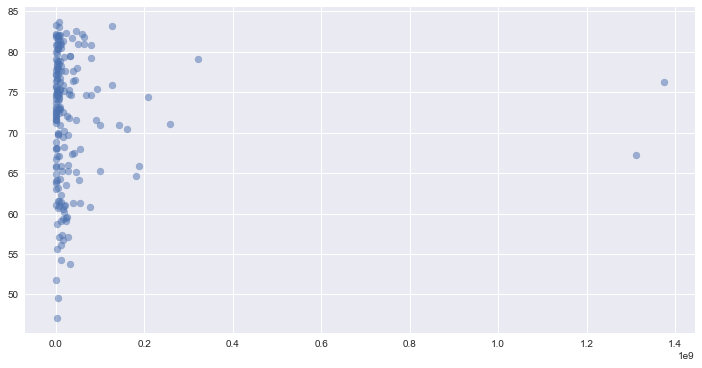

In [70]:
fig, ax = plt.subplots(figsize = (12,6))
im = ax.scatter(z, y, alpha=0.5)

But this plot is difficult for the interpretation as the x-axis scala seems to be not the most adecuate. Maybe a logarithm scala might solve the problem.

Text(0.5,1,'Effect of GDP on Population in a country')

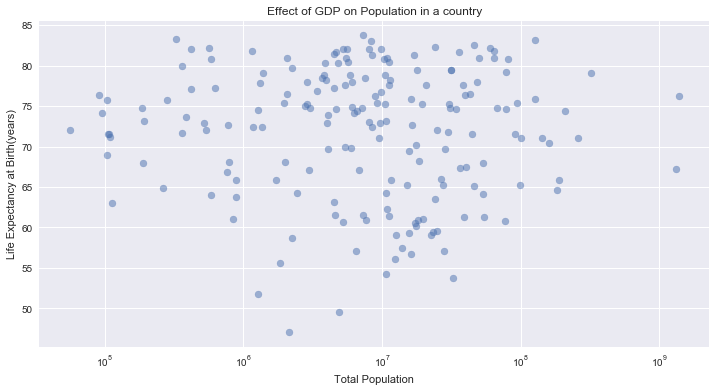

In [71]:
fig, ax = plt.subplots(figsize = (12,6))
im = ax.scatter(z, y, alpha=0.5)
ax.set_xscale('log')
plt.xlabel('Total Population')
plt.ylabel('Life Expectancy at Birth(years)')
plt.title('Effect of GDP on Population in a country')

Looking at the plot no correlation can be inferred, so it seems that **the population has no influence in the life expectancy of a country.**

### Research Question 3: <font color=blue>Are the countries which expend more money (%GDP) in health the ones having more life expectancy?</font> 


Unfortunately this dataset is containing only data from 1995 until 2010, compared to the previous dataframes that extended from 1800 to 2015. For that reason, the biggest dataframe df will be sliced to the timeframe 1995 to 2010 both inclusive and the health expenditure dataframe will be merged.

In [72]:
df_reduced = df[(df.year >= 1995) &  (df.year <= 2010)]
df_reduced.head()

country  year  life_exp    GDP  population
60  Afghanistan  1995      49.4  872.0  16772522.0
61  Afghanistan  1996      49.7  895.0  17481800.0
62  Afghanistan  1997      49.5  921.0  18034130.0
63  Afghanistan  1998      48.6  947.0  18511480.0
64  Afghanistan  1999      50.0  972.0  19038420.0

In [73]:
df_reduced.tail()

country  year  life_exp     GDP  population
15218  South Sudan  2006      55.4  3455.0   8445659.0
15219  South Sudan  2007      55.5  3756.0   8815495.0
15220  South Sudan  2008      55.6  3776.0   9208598.0
15221  South Sudan  2009      55.8  3799.0   9623176.0
15222  South Sudan  2010      56.0  3838.0  10056475.0

In [74]:
df_health = pd.merge(df_reduced, health_exp_df1, how='inner', on = ['country','year'])
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 6 columns):
country               2752 non-null object
year                  2752 non-null int64
life_exp              2752 non-null float64
GDP                   2752 non-null float64
population            2752 non-null float64
health_expenditure    2752 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 150.5+ KB


In [75]:
df_health.head()

country  year  life_exp     GDP  population  health_expenditure
0  Albania  1995      73.7  3941.0   3106727.0            2.559558
1  Albania  1996      73.8  4326.0   3092034.0            4.041886
2  Albania  1997      74.1  3909.0   3092471.0            4.806430
3  Albania  1998      74.2  4434.0   3102898.0            5.338640
4  Albania  1999      74.2  4912.0   3114851.0            5.833766

In [76]:
df_health.tail()

country  year  life_exp     GDP  population  health_expenditure
2747  Zambia  2006      47.9  2752.0  12381509.0            6.335205
2748  Zambia  2007      49.0  2901.0  12738676.0            5.833974
2749  Zambia  2008      51.1  3039.0  13114579.0            6.137377
2750  Zambia  2009      52.3  3224.0  13507849.0            6.212202
2751  Zambia  2010      53.1  3451.0  13917439.0            5.891186

In [77]:
df_health_2010 = df_health[df_health.year == 2010]
df_health_2010.reset_index(drop=True, inplace=True)
df_health_2010.head()
df_health_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
country               172 non-null object
year                  172 non-null int64
life_exp              172 non-null float64
GDP                   172 non-null float64
population            172 non-null float64
health_expenditure    172 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


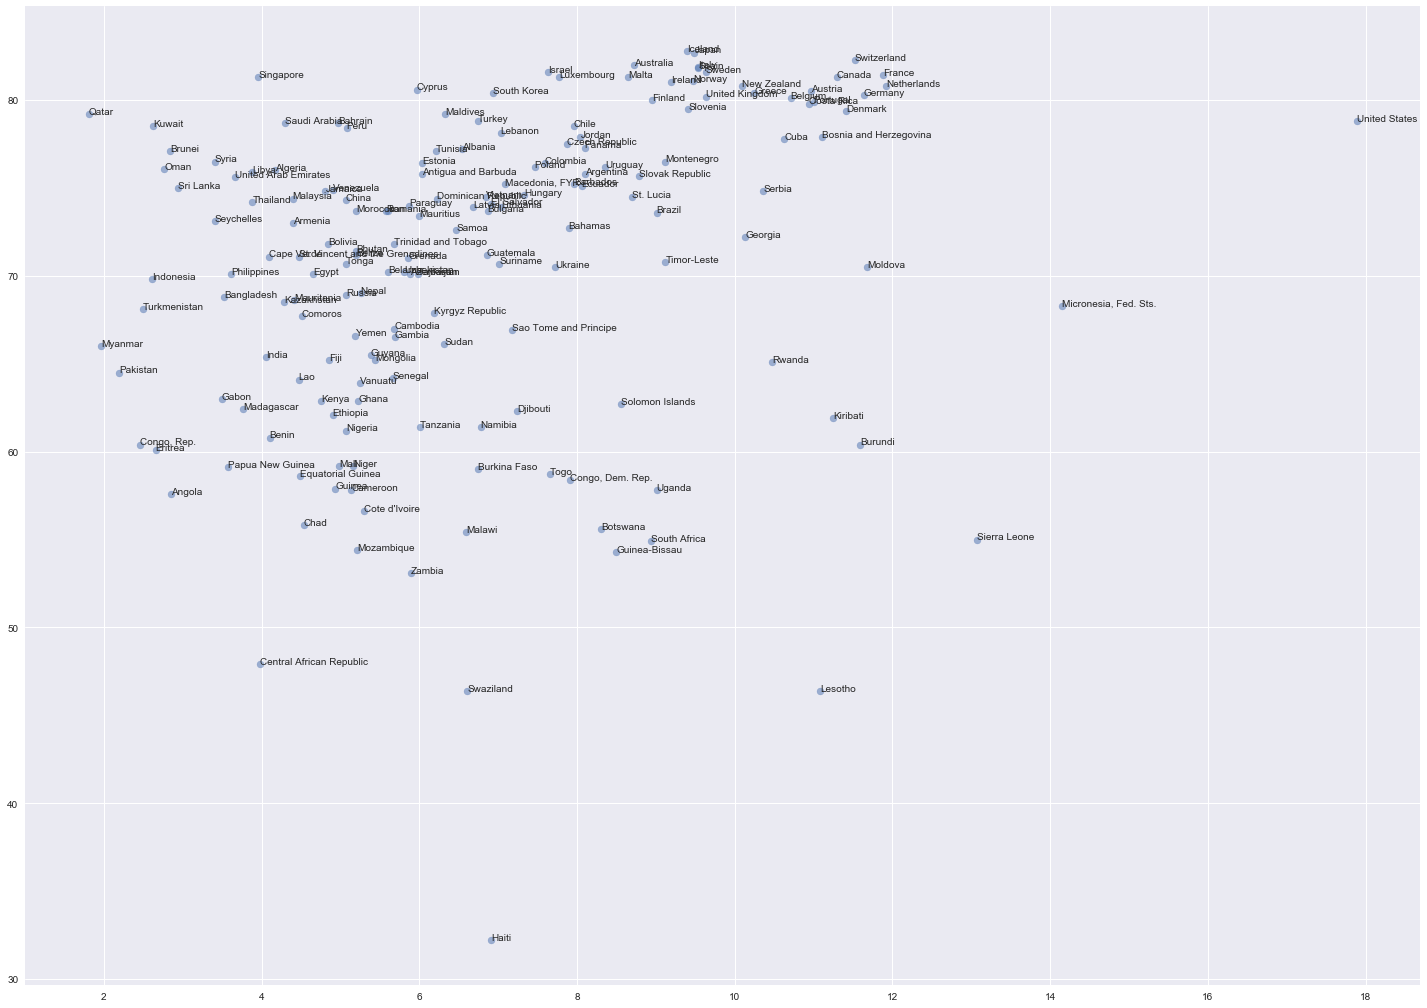

In [78]:
x = df_health_2010['health_expenditure']
y = df_health_2010['life_exp']
n = df_health_2010['country']
fig, ax = plt.subplots(figsize=(25,18))
im = ax.scatter(x, y, alpha=0.5)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
    
#plt.xlabel('GDP per capita($)')
#plt.ylabel('Life Expectancy at Birth(years)')
#plt.title('Effect of GDP on Life Expectancy in a country')

Looking at this plot it is difficult to find a strong correlation, as there are some countries having the same % GDP expended in health system but the life expectancy is differing in around 50 years, e.g. Haiti and South Korea, or countries like Lesotho having more than 5 times %GDP expended compared to Qatar, however its life expectancy is around 45 years compared to Qatar (~79 years). This yields the conclusion that it seems to be some other factors affecting the life expectancy like natural disasters, war, etc.

<a id='conclusions'></a>
## Conclusions

The main objective of the analysis was to show how the life expectancy has been evolving with the time and to demostrate that from 1800 until today there is a significant increase in the life expectancy, mainly the progress in the world with the industrial revolution and even having suffered two world wars, the consecutive scientific development in the world demostrate that life expectancy has more than doubled in the last two centuries.

As a country develops, the GDP per capita increases and might lead to infer that the life expectancy increase might have a correlation with GDP. However with the existing data, it is difficult to establish a direct correlation between both variables, as the scatter plot shows, because it can be found examples of countries where a high GDP does not necessarily mean to have a high life expectancy.

Trying to find other dependencies of the life expectancy with other variables like population or health expenditure in % of GDP, result in the same conclusions: with the data used for this analysis, some weak dependencies might be inferred for the health expenditure, again finding examples that fail to meet the correlation whereas the population does not show any correlation with the life expectancy.